In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class PosSensor(object):
    def __init__(self, pos=(0,0), vel=(0,0), noise_std=0.1):
        self.vel = vel
        self.noise_std = noise_std
        self.pos = [pos[0], pos[1]]
        
    def read(self):
        self.pos[0] += self.vel[0]
        self.pos[1] += self.vel[1]
        
        return [self.pos[0] + np.random.randn() * self.noise_std,
                self.pos[1] + np.random.randn() * self.noise_std]
        

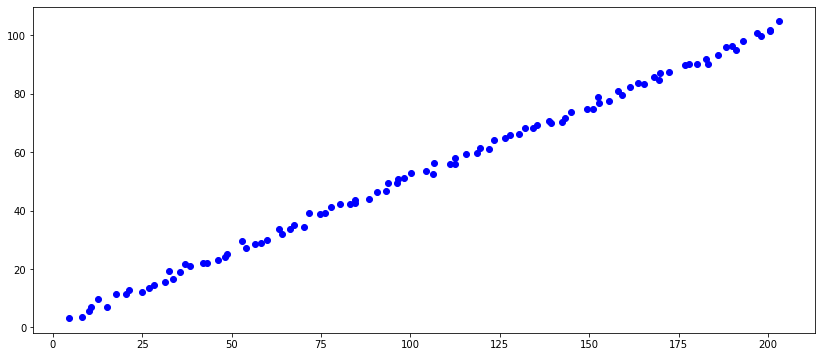

In [12]:
pos, vel = (4,3), (2,1)
sensor = PosSensor(pos, vel, noise_std=1)
ps = np.array([sensor.read() for _ in range(100)])
plt.figure(figsize=(14,6))
plt.plot(ps[:,0], ps[:,1], "bo")

In [72]:
class KF:
    def __init__(self, dt, x_init):
        self.x = np.array(x_init).reshape(-1,1)
        self.F = np.array([[1, dt, 0, 0], [0, 1, 0, 0], [0, 0, 1, dt], [0, 0, 0, 1]])
        self.Q = np.array([[0, 0.001, 0, 0], [0.001, 0.001, 0, 0], [0, 0, 0, 0.001], [0, 0, 0.001, 0.001]])
        self.P = np.identity(4) * 500
        
        self.H = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])
        self.R = np.array([[5, 0], [0, 5]])
        self.K = np.zeros((4,2))
        
    def predict(self):
        self.x = self.F @ self.x
        self.P = self.F @ self.P @ self.F.transpose()
    
    def update(self, z):
        y = z - self.H @ self.x
        self.K = self.P @ self.H.transpose() @ np.linalg.pinv(self.H @ self.P @ self.H.transpose() + self.R)
        self.x = self.x + self.K @ y
        self.P = (np.identity(4) - self.K @ self.H) @ self.P

In [73]:
res = [[4,3]
kalmanFilter = KF(1, [4, 2, 3, 1])
for i in range(1, len(ps)):
    kalmanFilter.predict()
    kalmanFilter.update(ps[i,:].reshape(2,1))
    res.append([kalmanFilter.x[0], kalmanFilter.x[2]])

<ipython-input-83-1a3ba944d09a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res_np = np.array(res)


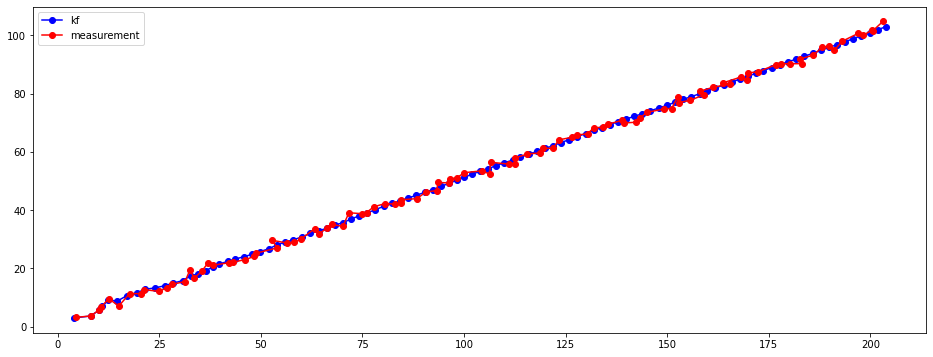

In [83]:
res_np = np.array(res)
plt.figure(figsize=(16,6))
plt.plot(res_np[:,0], res_np[:,1], "bo-", label="kf")
plt.plot(ps[:,0], ps[:,1], "ro-", label="measurement")
plt.legend()